In [209]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.io as pio
from urllib.request import urlopen
import plotly.graph_objects as go
pio.templates.default = "plotly"

In [210]:
import json
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

In [233]:
from mpl_toolkits.mplot3d import Axes3D

In [211]:
df = pd.read_excel('sales.xlsx')

**FIRST 5 ROWS:**

In [212]:
df.head()

,Row ID,Order ID,Order Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,13,CA-2017-114412,2020-04-15,Standard Class,AA-10480,Andrew Allen,Consumer,United States,Concord,North Carolina,28027,South,OFF-PA-10002365,Office Supplies,Paper,Xerox 1967,15.552,3,0.2,5.4432
1,24,US-2017-156909,2020-07-16,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,Pennsylvania,19140,East,FUR-CH-10002774,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.372,2,0.3,-1.0196
2,35,CA-2017-107727,2020-10-19,Second Class,MA-17560,Matt Abelman,Home Office,United States,Houston,Texas,77095,Central,OFF-PA-10000249,Office Supplies,Paper,Easy-staple paper,29.472,3,0.2,9.9468
3,42,CA-2017-120999,2020-09-10,Standard Class,LC-16930,Linda Cazamias,Corporate,United States,Naperville,Illinois,60540,Central,TEC-PH-10004093,Technology,Phones,Panasonic Kx-TS550,147.168,4,0.2,16.5564
4,44,CA-2017-139619,2020-09-19,Standard Class,ES-14080,Erin Smith,Corporate,United States,Melbourne,Florida,32935,South,OFF-ST-10003282,Office Supplies,Storage,"Advantus 10-Drawer Portable Organizer, Chrome ...",95.616,2,0.2,9.5616


**LAST 5 ROWS:**

In [213]:
df.tail()

,Row ID,Order ID,Order Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
3307,9989,CA-2017-163629,2020-11-17,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,Georgia,30605,South,TEC-PH-10004006,Technology,Phones,Panasonic KX - TS880B Telephone,206.100,5,0.0,55.6470
3308,9991,CA-2017-121258,2020-02-26,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
3309,9992,CA-2017-121258,2020-02-26,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
3310,9993,CA-2017-121258,2020-02-26,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
3311,9994,CA-2017-119914,2020-05-04,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,California,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


**COLUMN NAMES:**

In [214]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

**DESCRIPTIVE STATISTICS SUMMARY:**

In [215]:
df.describe()

,Row ID,Order Date,Postal Code,Sales,Quantity,Discount,Profit
count,3312.000000,3312,3312.000000,3312.000000,3312.000000,3312.000000,3312.000000
mean,5087.107488,2020-08-07 06:03:02.608695808,56186.515097,221.381418,3.766908,0.156467,28.212340
min,13.000000,2020-01-01 00:00:00,1841.000000,0.444000,1.000000,0.000000,-3839.990400
25%,2655.750000,2020-05-15 00:00:00,27978.750000,17.018000,2.000000,0.000000,1.763200
50%,5183.500000,2020-09-02 00:00:00,60472.500000,53.810000,3.000000,0.200000,8.296800
75%,7498.250000,2020-11-06 00:00:00,90032.000000,205.105700,5.000000,0.200000,28.315125
max,9994.000000,2020-12-30 00:00:00,99301.000000,13999.960000,14.000000,0.800000,6719.980800
std,2817.482266,NaN,31980.375516,585.257531,2.221776,0.207429,241.864342


**OVERALL SALES TREND:**

In [216]:
df['Order Date'].min()

Timestamp('2020-01-01 00:00:00')

In [217]:
df['Order Date'].max()

Timestamp('2020-12-30 00:00:00')

**TOP 10 PRODUCTS BY SALES:**

**Grouping:**

In [218]:
product_sales = df.groupby('Product Name')['Sales'].sum()
product_sales

Product Name
"While you Were Out" Message Book, One Form per Page                                                    25.228
#10 Gummed Flap White Envelopes, 100/Box                                                                 9.912
#10 Self-Seal White Envelopes                                                                           22.180
#10 White Business Envelopes,4 1/8 x 9 1/2                                                              84.618
#10- 4 1/8" x 9 1/2" Recycled Envelopes                                                                 89.148
                                                                                                        ...   
iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4     67.040
iOttie HLCRIO102 Car Mount                                                                             119.940
iOttie XL Car Mount                                                                                

**Sorting in descending order:**

In [219]:
sorted_product_sales = product_sales.sort_values(ascending = False)
sorted_product_sales

Product Name
Canon imageCLASS 2200 Advanced Copier                               35699.898
Martin Yale Chadless Opener Electric Letter Opener                  11825.902
GBC DocuBind TL300 Electric Binding System                          10943.278
Hewlett Packard LaserJet 3310 Copier                                 9239.846
Samsung Galaxy Mega 6.3                                              9239.780
                                                                      ...    
Avery Hidden Tab Dividers for Binding Systems                           1.788
Computer Printout Index Tabs                                            1.680
Eureka Disposable Bags for Sanitaire Vibra Groomer I Upright Vac        1.624
Self-Adhesive Ring Binder Labels                                        1.408
Hoover Commercial Lightweight Upright Vacuum                            1.392
Name: Sales, Length: 1511, dtype: float64

**MOST PREFERRED SHIPPING:**

<function matplotlib.pyplot.show(close=None, block=None)>

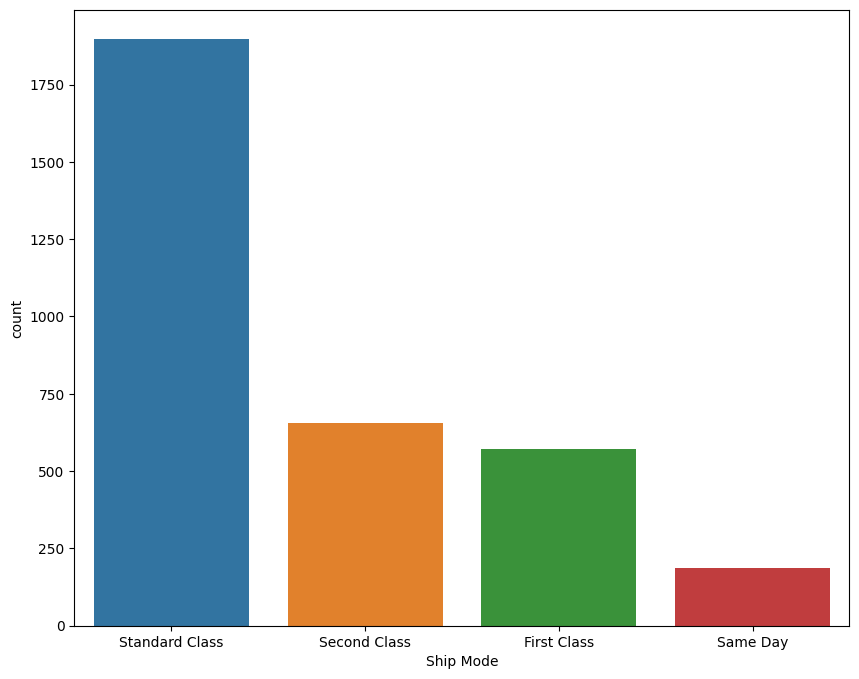

In [220]:
plt.figure(figsize = (10, 8))
sns.countplot(x = 'Ship Mode', data = df)
plt.show

**MOST PROFITABLE CATEGORY AND SUB-CATEGORY:**

In [221]:
cat_sub = df.groupby(['Category', 'Sub-Category'])['Profit'].sum()
cat_sub

Category         Sub-Category
Furniture        Bookcases        -583.6261
                 Chairs           7643.5493
                 Furnishings      4099.1628
                 Tables          -8140.6947
Office Supplies  Appliances       7865.2683
                 Art              2221.9631
                 Binders          7669.7418
                 Envelopes        1441.7590
                 Fasteners         304.9489
                 Labels           1744.6093
                 Paper           12040.8434
                 Storage          7402.8007
                 Supplies         -955.3128
Technology       Accessories     15672.3570
                 Copiers         25031.7902
                 Machines        -2869.2156
                 Phones          12849.3250
Name: Profit, dtype: float64

In [222]:
sorted_cat_sub = cat_sub.sort_values(ascending = [False])
sorted_cat_sub

Category         Sub-Category
Technology       Copiers         25031.7902
                 Accessories     15672.3570
                 Phones          12849.3250
Office Supplies  Paper           12040.8434
                 Appliances       7865.2683
                 Binders          7669.7418
Furniture        Chairs           7643.5493
Office Supplies  Storage          7402.8007
Furniture        Furnishings      4099.1628
Office Supplies  Art              2221.9631
                 Labels           1744.6093
                 Envelopes        1441.7590
                 Fasteners         304.9489
Furniture        Bookcases        -583.6261
Office Supplies  Supplies         -955.3128
Technology       Machines        -2869.2156
Furniture        Tables          -8140.6947
Name: Profit, dtype: float64

**SALES BY STATES:**

In [223]:
fig = px.choropleth_mapbox(df, geojson='https://raw.githubusercontent.com/python-visualization/folium/master/tests/us-states.json', 
                           locations='State', 
                           featureidkey="properties.name",
                           color='Sales',
                           color_continuous_scale="Viridis",
                           range_color=(0, 12),
                           mapbox_style="carto-positron",
                           zoom=3, center = {"lat": 37.0902, "lon": -95.7129},
                           opacity=1,
                           labels={'Sales':'Sales'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

**DISCOUNT & SALE & QUANTITY AND PROFIT CORRELATION:**

In [225]:
selected_corr_columns = ['Sales', 'Profit', 'Quantity', 'Discount']
df2 = df[selected_corr_columns]
correlation_matrix = df2.corr()

**Creating the heatmap:**

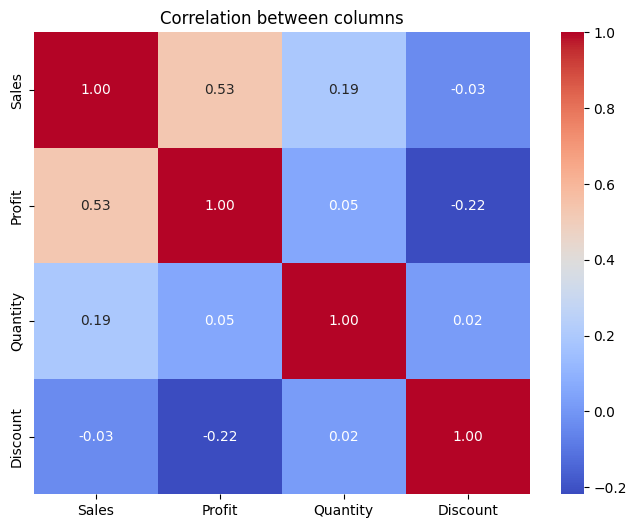

In [226]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between columns')
plt.show()

**DISCOUNT & SALE ANALYSIS:**

In [227]:
df.groupby('Discount')['Sales'].mean()

Discount
0.00    219.382484
0.10    677.048143
0.15    547.674656
0.20    203.855248
0.30    460.395559
0.32    337.919200
0.40    494.203652
0.45    627.402875
0.50    726.391842
0.60     52.298256
0.70     87.373152
0.80     73.175234
Name: Sales, dtype: float64

In [228]:
df.groupby('Discount')['Profit'].mean()

Discount
0.00     65.507995
0.10    117.878318
0.15     33.595806
0.20     26.993730
0.30    -56.876503
0.32    -44.748182
0.40   -113.523857
0.45   -307.110150
0.50   -361.283595
0.60    -50.484044
0.70    -87.469211
0.80   -123.780036
Name: Profit, dtype: float64

In [229]:
df.groupby('Sales')['Profit'].mean()

Sales
0.444          -1.1100
0.556          -0.9452
0.990           0.4356
1.080          -0.7920
1.188          -1.9602
               ...    
5443.960     2504.2216
7999.980    -3839.9904
10499.970    5039.9856
11199.968    3919.9888
13999.960    6719.9808
Name: Profit, Length: 2623, dtype: float64

**TIME SERIES GRAPHS:**

In [231]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [232]:
fig = px.line(df, x='Order Date', y=['Sales', 'Profit'], title='Profits and Sales by time')
fig.show()

**3D GRAPH OF SALES AND PROFITS:**

In [234]:
sales = df['Sales']
profit = df['Profit']

In [235]:
X, Y = np.meshgrid(sales, profit)
Z = np.sin(np.sqrt(X**2 + Y**2))

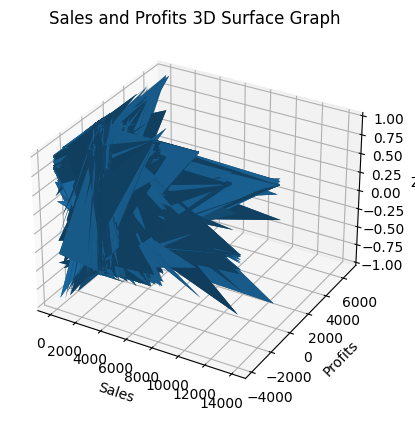

In [237]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z)
ax.set_xlabel('Sales')
ax.set_ylabel('Profits')
ax.set_zlabel('Z')

plt.title('Sales and Profits 3D Surface Graph')
plt.show()

**CUSTOMER ANALYSIS:**

In [238]:
segment_sales = df.groupby('Segment')['Sales'].sum()
segment_profit = df.groupby('Segment')['Profit'].sum()

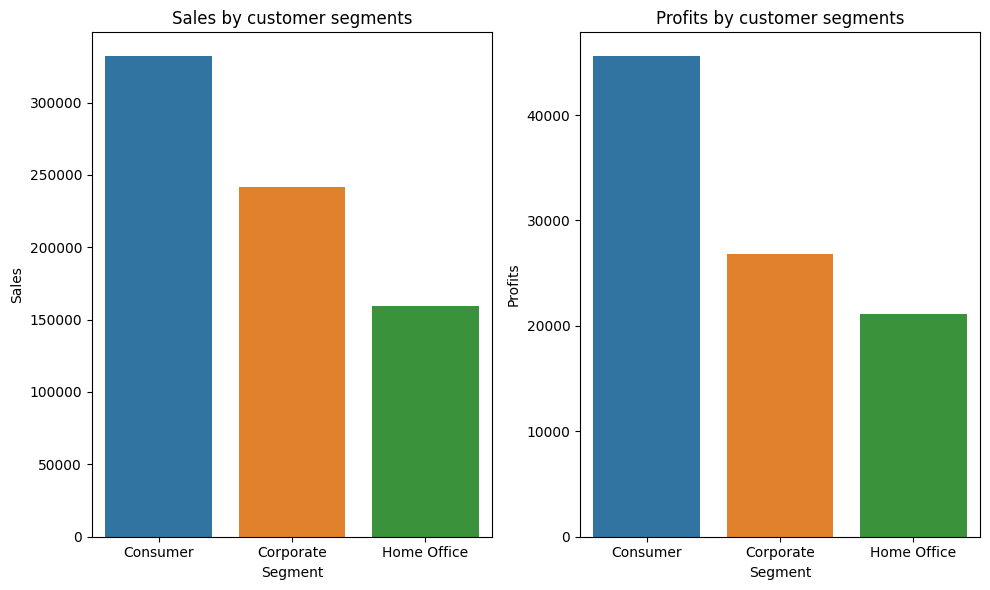

In [241]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=segment_sales.index, y=segment_sales.values)
plt.title('Sales by customer segments')
plt.xlabel('Segment')
plt.ylabel('Sales')

plt.subplot(1, 2, 2)
sns.barplot(x=segment_profit.index, y=segment_profit.values)
plt.title('Profits by customer segments')
plt.xlabel('Segment')
plt.ylabel('Profits')

plt.tight_layout()
plt.show()